In [53]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [54]:
data = pd.read_csv('patients_data_with_RVoutcomes.csv')
print(data.columns)


Index(['patKey', 'patid', 'rhcId', 'RHCDate', 'Sex', 'Height', 'Weight',
       'Birthday', 'CO_td', 'CO_fick', 'PCW', 'PCWa', 'PCWv', 'PAs', 'PAd',
       'RVs', 'RVmin', 'RVd', 'RAa', 'RAv', 'RAm', 'LVs', 'LVd', 'LVmin',
       'SAs', 'SAd', 'HR_rhc', 'HR_vitals', 'HR_vitals_std', 'NIBPs_vitals',
       'NIBPs_vitals_std', 'NIBPd_vitals', 'NIBPd_vitals_std', 'As', 'Ad',
       'tteId', 'TTEDate', 'LVIDd', 'LVIDs', 'HR_tte', 'LVEF_tte', 'EA',
       'IVSd', 'LVPWd', 'LAd', 'VLA', 'AVr', 'AVpg', 'MVr', 'MVmg', 'TVr',
       'TVmg', 'PVr', 'PVpg', 'AVr_str', 'MVr_str', 'TVr_str', 'PVr_str',
       'patkey', 'RV Dysfunction'],
      dtype='object')


/var/folders/dz/fbr6_yrs1qd7cqdgs7l6dw780000gn/T/ipykernel_94154/454378334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='patid',y='RV Dysfunction',data=data,palette='winter')


<Axes: xlabel='patid', ylabel='RV Dysfunction'>

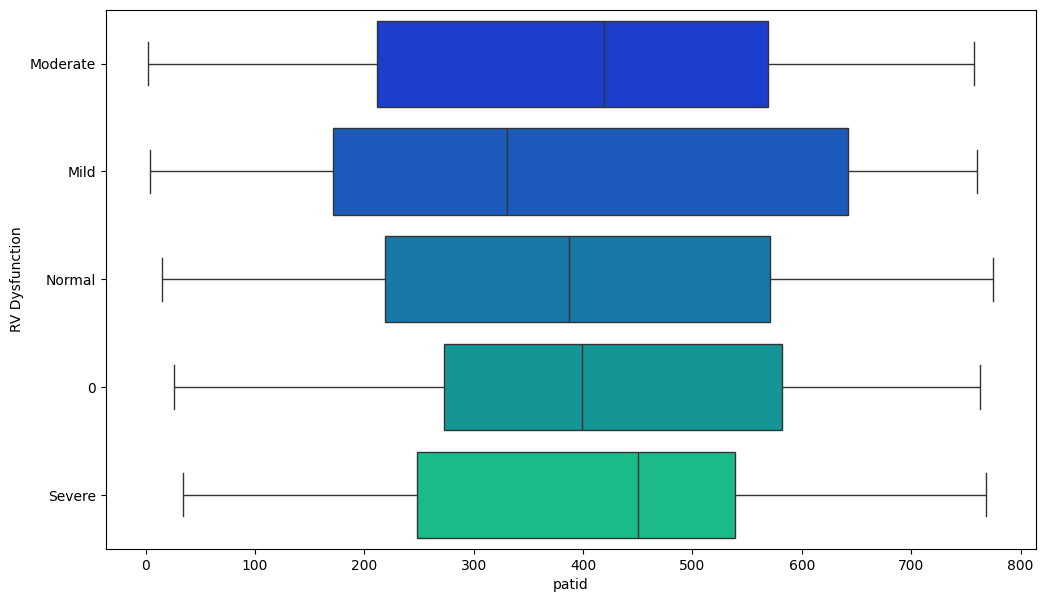

In [55]:
data = data.dropna(subset=['Birthday'])
plt.figure(figsize=(12, 7))
sns.boxplot(x='patid',y='RV Dysfunction',data=data,palette='winter')

In [56]:
# Impute missing values for all numeric columns
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'most_frequent' as needed
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame if needed
X = pd.DataFrame(X_imputed, columns=X.columns)

In [57]:
# Step 1: Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 2: Encode non-numeric columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")


Non-numeric columns: Index([], dtype='object')
Data preprocessing completed!


In [58]:
# Initialize the model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)


/opt/homebrew/anaconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [59]:
# Predict on the test data
y_pred = log_reg.predict(X_test)

In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.30526315789473685

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
        Mild       0.35      0.31      0.33        29
    Moderate       0.26      0.29      0.27        24
      Normal       0.39      0.54      0.46        24
      Severe       0.00      0.00      0.00        12

    accuracy                           0.31        95
   macro avg       0.20      0.23      0.21        95
weighted avg       0.27      0.31      0.28        95


Confusion Matrix:
 [[ 0  4  0  2  0]
 [ 0  9 11  8  1]
 [ 1  4  7  8  4]
 [ 1  5  4 13  1]
 [ 1  4  5  2  0]]


In [61]:
# Extract feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]  # Use for binary classification or split per class for multi-class
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:\n", coefficients)


Feature Importance:
              Feature  Coefficient
29  NIBPd_vitals_std     0.642458
17               RAm     0.613211
51           MVr_str     0.515293
24         HR_vitals     0.477124
26      NIBPs_vitals     0.439254
13             RVmin     0.427959
37                EA     0.397962
10               PAs     0.395451
38              IVSd     0.356767
12               RVs     0.252654
22               SAd     0.231270
46               TVr     0.205476
44               MVr     0.193077
21               SAs     0.176774
32             tteId     0.146420
5              CO_td     0.137056
16               RAv     0.134186
2                Sex     0.120789
3             Height     0.106320
1              rhcId     0.060366
53           PVr_str     0.017737
19               LVd     0.014454
20             LVmin     0.010711
47              TVmg    -0.000025
14               RVd    -0.002567
49              PVpg    -0.005058
41               VLA    -0.018176
0              patid    -0

In [65]:
# Plot confusion matrix
labels = y.unique()
'''sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()'''
print(y.value_counts())

RV Dysfunction
Normal      137
Mild        136
Moderate    129
Severe       49
0            21
Name: count, dtype: int64


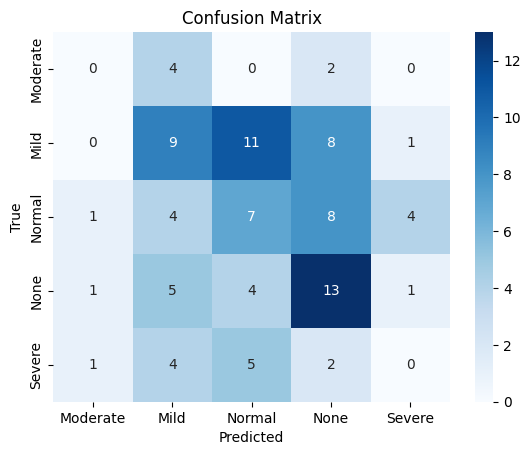

In [67]:
# Map '0' to 'None' or another descriptive label
y = y.replace('0', 'None')
labels = y.unique()  # Updated labels after cleaning

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [70]:
# Convert confusion matrix to a DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print(conf_matrix_df)

          Moderate  Mild  Normal  None  Severe
Moderate         0     4       0     2       0
Mild             0     9      11     8       1
Normal           1     4       7     8       4
None             1     5       4    13       1
Severe           1     4       5     2       0


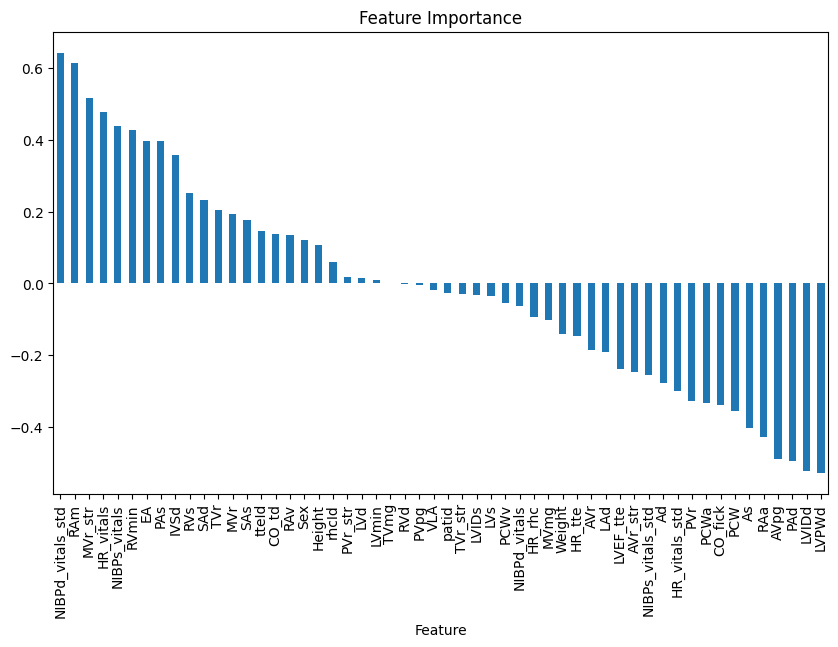

In [68]:
# Bar plot for feature importance
coefficients.plot(kind='bar', x='Feature', y='Coefficient', legend=False, figsize=(10, 6))
plt.title("Feature Importance")
plt.show()